<a href="https://colab.research.google.com/github/brownht1/mtpa/blob/master/Project_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IST 718 Group Project
Amani Alawmeh and Haley Brown

OSEMN on Loan Data

Import packages

In [1]:
import pandas as pd
import os
import re
import io
import numpy as np
from scipy.stats import uniform  
import statsmodels.api as sm  
import statsmodels.formula.api as smf 
import matplotlib.pyplot as plt  
from matplotlib import pyplot 
import matplotlib as mpl
import plotly.plotly as py
import plotly.graph_objs as go
import statsmodels.stats.stattools as stools
import statsmodels.stats as stats
from statsmodels.graphics.regressionplots import *
import pandas as pd
from pandas import Series
%matplotlib inline
from datetime import datetime
import seaborn as sns  
import patsy  
import math  
import datetime as dt 
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
from decimal import Decimal
from babel.numbers import format_currency


from botocore.client import Config
import matplotlib.pyplot as plt

import plotly.plotly as py
import plotly.tools as tls

from pandas import Series
from datetime import datetime
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import linear_model


/usr/local/lib/python3.6/dist-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


# Obtain

Approved loans applications from Lending Club for years 2007-2011

In [2]:
from google.colab import files
uploaded = files.upload()

Loans = pd.read_csv(io.BytesIO(uploaded['LoanStats3a.csv']))
print(Loans.head())


Saving LoanStats3a.csv to LoanStats3a.csv
    id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  NaN        NaN     5000.0       5000.0           4975.0   36 months   
1  NaN        NaN     2500.0       2500.0           2500.0   60 months   
2  NaN        NaN     2400.0       2400.0           2400.0   36 months   
3  NaN        NaN    10000.0      10000.0          10000.0   36 months   
4  NaN        NaN     3000.0       3000.0           3000.0   60 months   

  int_rate  installment grade sub_grade       ...        \
0   10.65%       162.87     B        B2       ...         
1   15.27%        59.83     C        C4       ...         
2   15.96%        84.33     C        C5       ...         
3   13.49%       339.31     C        C1       ...         
4   12.69%        67.79     B        B5       ...         

  hardship_payoff_balance_amount hardship_last_payment_amount  \
0                            NaN                          NaN   
1                           

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning:

Columns (0,47) have mixed types. Specify dtype option on import or set low_memory=False.



# Scrub
Review data, clean, and create dataframe

In [4]:
LoansDF = pd.DataFrame(Loans)
print(LoansDF.info())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42538 entries, 0 to 42537
Columns: 145 entries, id to settlement_term
dtypes: float64(115), object(30)
memory usage: 47.1+ MB
None


In [5]:
list(LoansDF)

['id',
 'member_id',
 'loan_amnt',
 'funded_amnt',
 'funded_amnt_inv',
 'term',
 'int_rate',
 'installment',
 'grade',
 'sub_grade',
 'emp_title',
 'emp_length',
 'home_ownership',
 'annual_inc',
 'verification_status',
 'issue_d',
 'loan_status',
 'pymnt_plan',
 'url',
 'desc',
 'purpose',
 'title',
 'zip_code',
 'addr_state',
 'dti',
 'delinq_2yrs',
 'earliest_cr_line',
 'inq_last_6mths',
 'mths_since_last_delinq',
 'mths_since_last_record',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'initial_list_status',
 'out_prncp',
 'out_prncp_inv',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int',
 'total_rec_late_fee',
 'recoveries',
 'collection_recovery_fee',
 'last_pymnt_d',
 'last_pymnt_amnt',
 'next_pymnt_d',
 'last_credit_pull_d',
 'collections_12_mths_ex_med',
 'mths_since_last_major_derog',
 'policy_code',
 'application_type',
 'annual_inc_joint',
 'dti_joint',
 'verification_status_joint',
 'acc_now_delinq',
 'tot_coll_amt',
 'tot_cur_

Keep the following columns and remove the variables (cols) that are not required for the analysis


In [0]:
# acc_now_delinq: The number of accounts on which the borrower is now delinquent
# acc_open_past_24mths:Number of trades opened in past 24 months.
# all_util: Balance to credit limit on all trades
# annual_inc: The self-reported annual income provided by the borrower during registration.
# chargeoff_within_12_mths: Number of charge-offs within 12 months
# collections_12_mths_ex_med: Number of collections in 12 months excluding medical collections
# delinq_2yrs: The number of 30+ days past-due incidences of delinquency in the borrower's credit
# fico_range_high: The upper boundary range the borrower’s FICO at loan origination belongs to.
# fico_range_low: The lower boundary range the borrower’s FICO at loan origination belongs to.
# funded_amnt: The total amount committed to that loan at that point in time.
# funded_amnt_inv: The total amount committed by investors for that loan at that point in time.
# loan_status: Current status of the loan
# mort_acc: Number of mortgage accounts.
# mths_since_last_delinq: Months since most recent 90-day or worse rating
# num_accts_ever_120_pd: Number of accounts ever 120 or more days past due
# pub_rec: Number of derogatory public records
# pub_rec_bankruptcies: Number of public record bankruptcies
# tax_liens: Number of tax liens
# tot_coll_amt: Total collection amounts ever owed
# hardship_flag: Flags whether or not the borrower is on a hardship plan
# pymnt_plan	Indicates if a payment plan has been put in place for the loan
# delinq_2yrs	The number of 30+ days past-due incidences of delinquency in the borrower's credit file for the past 2 years
# delinq_amnt	The past-due amount owed for the accounts on which the borrower is now delinquent
# purpose: A category provided by the borrower for the loan request. 
# issue_d: The month which the loan was funded




cols_list = ['acc_now_delinq','acc_open_past_24mths','loan_amnt','funded_amnt','funded_amnt_inv','purpose','term','rate','installment','grade','sub_grade',
           'home_ownership','annual_inc','loan_status','mort_acc','pymnt_plan','delinq_2yrs','earliest_cr_line','inq_last_6mths','mths_since_last_delinq',
           'all_util','chargeoff_within_12_mths','collections_12_mths_ex_med','fico_range_high','fico_range_low','num_accts_ever_120_pd', \
           'num_accts_ever_120_pd','delinq_amnt','mths_since_last_delinq','pub_rec','pub_rec_bankruptcies','tax_liens','hardship_flag',\
           'emp_title','emp_length','issue_d','tot_col_amt','inq_last_6mths']


There are several ways to approach and clean this data. We are simplifying the dataset by removing NA values and columns not needed for our business questions.

Remove columns that are not listed in the cols_list

In [7]:
for col_name in LoansDF.columns:
    if col_name not in cols_list:
        del LoansDF[col_name]
    
print(LoansDF.columns)

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'installment',
       'grade', 'sub_grade', 'emp_title', 'emp_length', 'home_ownership',
       'annual_inc', 'issue_d', 'loan_status', 'pymnt_plan', 'purpose',
       'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths',
       'mths_since_last_delinq', 'pub_rec', 'collections_12_mths_ex_med',
       'acc_now_delinq', 'all_util', 'acc_open_past_24mths',
       'chargeoff_within_12_mths', 'delinq_amnt', 'mort_acc',
       'num_accts_ever_120_pd', 'pub_rec_bankruptcies', 'tax_liens',
       'hardship_flag'],
      dtype='object')


Remove rows with null values

In [8]:
LoansDF = LoansDF.dropna(how='all') 
print(LoansDF.info())


<class 'pandas.core.frame.DataFrame'>
Int64Index: 42535 entries, 0 to 42537
Data columns (total 31 columns):
loan_amnt                     42535 non-null float64
funded_amnt                   42535 non-null float64
funded_amnt_inv               42535 non-null float64
term                          42535 non-null object
installment                   42535 non-null float64
grade                         42535 non-null object
sub_grade                     42535 non-null object
emp_title                     39909 non-null object
emp_length                    41423 non-null object
home_ownership                42535 non-null object
annual_inc                    42531 non-null float64
issue_d                       42535 non-null object
loan_status                   42535 non-null object
pymnt_plan                    42535 non-null object
purpose                       42535 non-null object
delinq_2yrs                   42506 non-null float64
earliest_cr_line              42506 non-null object
i

Drop columns with ALL missing values


In [0]:
LoansDF = LoansDF.dropna(axis=1, how='all') 
LoansDF = LoansDF.loc[:, (LoansDF > 0).any(axis=0)]


Remove rows with annual income is na values


In [10]:
LoansDF = LoansDF[LoansDF['annual_inc'].notnull()]

print(LoansDF.head())
print(LoansDF.info())

   loan_amnt  funded_amnt  funded_amnt_inv        term  installment grade  \
0     5000.0       5000.0           4975.0   36 months       162.87     B   
1     2500.0       2500.0           2500.0   60 months        59.83     C   
2     2400.0       2400.0           2400.0   36 months        84.33     C   
3    10000.0      10000.0          10000.0   36 months       339.31     C   
4     3000.0       3000.0           3000.0   60 months        67.79     B   

  sub_grade                 emp_title emp_length home_ownership  \
0        B2                       NaN  10+ years           RENT   
1        C4                     Ryder   < 1 year           RENT   
2        C5                       NaN  10+ years           RENT   
3        C1       AIR RESOURCES BOARD  10+ years           RENT   
4        B5  University Medical Group     1 year           RENT   

       ...        delinq_2yrs earliest_cr_line inq_last_6mths  \
0      ...                0.0           Jan-85            1.0   
1   

In [11]:
list(LoansDF)

['loan_amnt',
 'funded_amnt',
 'funded_amnt_inv',
 'term',
 'installment',
 'grade',
 'sub_grade',
 'emp_title',
 'emp_length',
 'home_ownership',
 'annual_inc',
 'issue_d',
 'loan_status',
 'pymnt_plan',
 'purpose',
 'delinq_2yrs',
 'earliest_cr_line',
 'inq_last_6mths',
 'mths_since_last_delinq',
 'pub_rec',
 'acc_now_delinq',
 'delinq_amnt',
 'pub_rec_bankruptcies',
 'tax_liens',
 'hardship_flag']

# Explore

Explore data using essential qualitative analysis techniques, including descriptive statistics.


In [12]:
print("--------------------------------------------------")
print("DESCRIPTIVE STATISTICS:")
print("--------------------------------------------------")
print(LoansDF.describe())


--------------------------------------------------
DESCRIPTIVE STATISTICS:
--------------------------------------------------
          loan_amnt   funded_amnt  funded_amnt_inv   installment  \
count  42531.000000  42531.000000     42531.000000  42531.000000   
mean   11090.173050  10822.011004     10140.582662    322.634879   
std     7411.137529   7147.112309      7131.587121    208.933353   
min      500.000000    500.000000         0.000000     15.670000   
25%     5200.000000   5000.000000      4950.000000    165.520000   
50%     9700.000000   9600.000000      8500.000000    277.710000   
75%    15000.000000  15000.000000     14000.000000    428.275000   
max    35000.000000  35000.000000     35000.000000   1305.190000   

         annual_inc   delinq_2yrs  inq_last_6mths  mths_since_last_delinq  \
count  4.253100e+04  42506.000000    42506.000000            15609.000000   
mean   6.913656e+04      0.152449        1.081424               35.017618   
std    6.409635e+04      0.512

Visualizations

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning:

remove_na is deprecated and is a private function. Do not use.



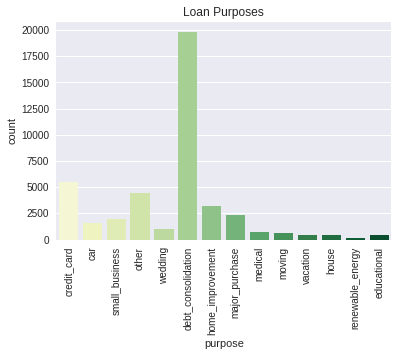

/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning:


The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.



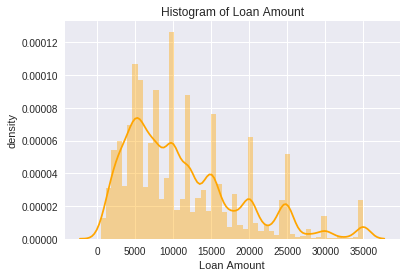

/usr/local/lib/python3.6/dist-packages/numpy/lib/function_base.py:780: RuntimeWarning:

invalid value encountered in greater_equal

/usr/local/lib/python3.6/dist-packages/numpy/lib/function_base.py:781: RuntimeWarning:

invalid value encountered in less_equal

/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:454: RuntimeWarning:

invalid value encountered in greater

/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:454: RuntimeWarning:

invalid value encountered in less



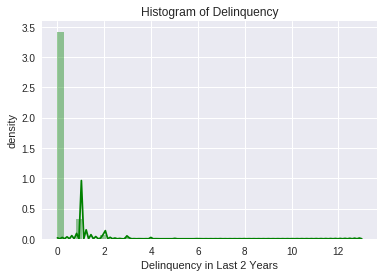

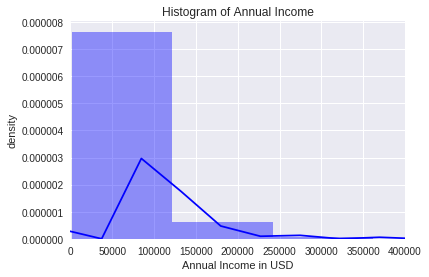

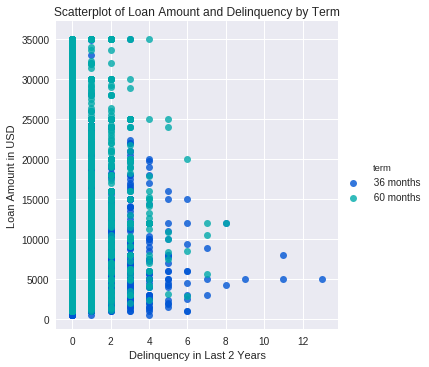

In [13]:
# Count of loans by purpose:
sns.countplot(x='purpose', data=LoansDF, palette="YlGn")
plt.title("Loan Purposes") 
plt.xticks(rotation=90)
plt.show()


# Distribution Plot of loan amount
sns.distplot(LoansDF.loan_amnt, color='orange')
plt.xlabel('Loan Amount')
plt.ylabel('density')
plt.title("Histogram of Loan Amount") 
plt.show()

sns.distplot(LoansDF.delinq_2yrs, color='green')
plt.xlabel('Delinquency in Last 2 Years')
plt.ylabel('density')
plt.title("Histogram of Delinquency") 
plt.show()


plt.xlim(0,400000)
sns.distplot(LoansDF.annual_inc, color='blue')
plt.xlabel('Annual Income in USD')
plt.ylabel('density')
plt.title("Histogram of Annual Income") 
plt.show()


# Line plot of loan amount and delinquency
sns.lmplot(x='delinq_2yrs', y='loan_amnt', data=LoansDF, fit_reg=False, hue='term', palette="winter")
plt.xlabel('Delinquency in Last 2 Years')
plt.ylabel('Loan Amount in USD')
plt.title("Scatterplot of Loan Amount and Delinquency by Term") 
plt.show()


# Model 

Business Questions
1. What factors are most important in predicting delinquency and grading? 
2. Can we predict whether a loan will be charged off or paid in full? 
3. Can we predict the “grade” a loan will receive? 
4. Can we use text analytics to learn what people are borrowing money for? 
5. How is LC’s system performing on risk management measures? (How well is their grading system working?)

Question 1 through 3


In [0]:
Q1loans = LoansDF

In [0]:
Q1loans=pd.DataFrame(Q1loans)

In [16]:
Q1loans = Q1loans.dropna() 

Q1loans.head()


,loan_amnt,funded_amnt,funded_amnt_inv,term,installment,grade,sub_grade,emp_title,emp_length,home_ownership,...,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,pub_rec,acc_now_delinq,delinq_amnt,pub_rec_bankruptcies,tax_liens,hardship_flag
3,10000.0,10000.0,10000.0,36 months,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,...,0.0,Feb-96,1.0,35.0,0.0,0.0,0.0,0.0,0.0,N
4,3000.0,3000.0,3000.0,60 months,67.79,B,B5,University Medical Group,1 year,RENT,...,0.0,Jan-96,0.0,38.0,0.0,0.0,0.0,0.0,0.0,N
16,10000.0,10000.0,10000.0,36 months,347.98,C,C4,Chin's Restaurant,4 years,RENT,...,0.0,Oct-98,2.0,61.0,0.0,0.0,0.0,0.0,0.0,N
18,6000.0,6000.0,6000.0,36 months,198.46,B,B3,Connection Inspection,1 year,MORTGAGE,...,2.0,Oct-03,0.0,8.0,0.0,0.0,0.0,0.0,0.0,N
27,5000.0,5000.0,5000.0,60 months,123.65,D,D2,Frito Lay,2 years,RENT,...,3.0,Oct-03,0.0,20.0,0.0,0.0,0.0,0.0,0.0,N


In [17]:
Q1loans.isnull().values.any()

False

In [18]:
Q1loans.describe()

,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,pub_rec,acc_now_delinq,delinq_amnt,pub_rec_bankruptcies,tax_liens
count,13431.000000,13431.000000,13431.000000,13431.000000,1.343100e+04,13431.000000,13431.000000,13431.000000,13431.000000,13431.0,13431.0,13431.000000,13431.0
mean,10517.833743,10278.808354,9743.763473,312.319614,7.199281e+04,0.430571,1.115181,37.049140,0.075199,0.0,0.0,0.050257,0.0
std,7115.548735,6846.597454,6777.796595,204.756142,7.460647e+04,0.779532,1.445583,21.431624,0.280947,0.0,0.0,0.219842,0.0
min,1000.000000,1000.000000,0.000000,21.740000,8.400000e+03,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0
25%,5000.000000,5000.000000,4900.000000,162.550000,4.335600e+04,0.000000,0.000000,20.000000,0.000000,0.0,0.0,0.000000,0.0
50%,9000.000000,8500.000000,8000.000000,265.970000,6.000000e+04,0.000000,1.000000,35.000000,0.000000,0.0,0.0,0.000000,0.0
75%,14500.000000,14000.000000,13200.000000,408.200000,8.500000e+04,1.000000,2.000000,53.000000,0.000000,0.0,0.0,0.000000,0.0
max,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,11.000000,15.000000,120.000000,4.000000,0.0,0.0,2.000000,0.0


Create a grade dictionary to code Grade for modeling


In [0]:
grade_dictionary = {'A':0,
                    'B':1,
                    'C':2,
                    'D':3,
                    'E':4,
                    'F':5}

In [0]:
Q1loans['grade_number'] = Q1loans['grade'].map(grade_dictionary)

Create a loan status dictionary to code Loan Status for modeling


In [0]:
status_dictionary = {'Fully Paid':0,
                    'Charged Off':1}

In [0]:
Q1loans['status_code']= Q1loans['loan_status'].map(status_dictionary)

In [23]:
Q1loans.isnull().values.any()

True

In [0]:
Q1loans = Q1loans.dropna() 


In [25]:
Q1loans.isnull().values.any()

False

Question 1
Let's get a better understanding of how our variables are correlated.

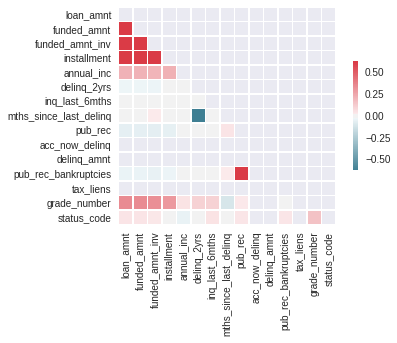

In [26]:
corr = Q1loans.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

Variable correlations.
Green = Charged off
Blue = Paid in Full

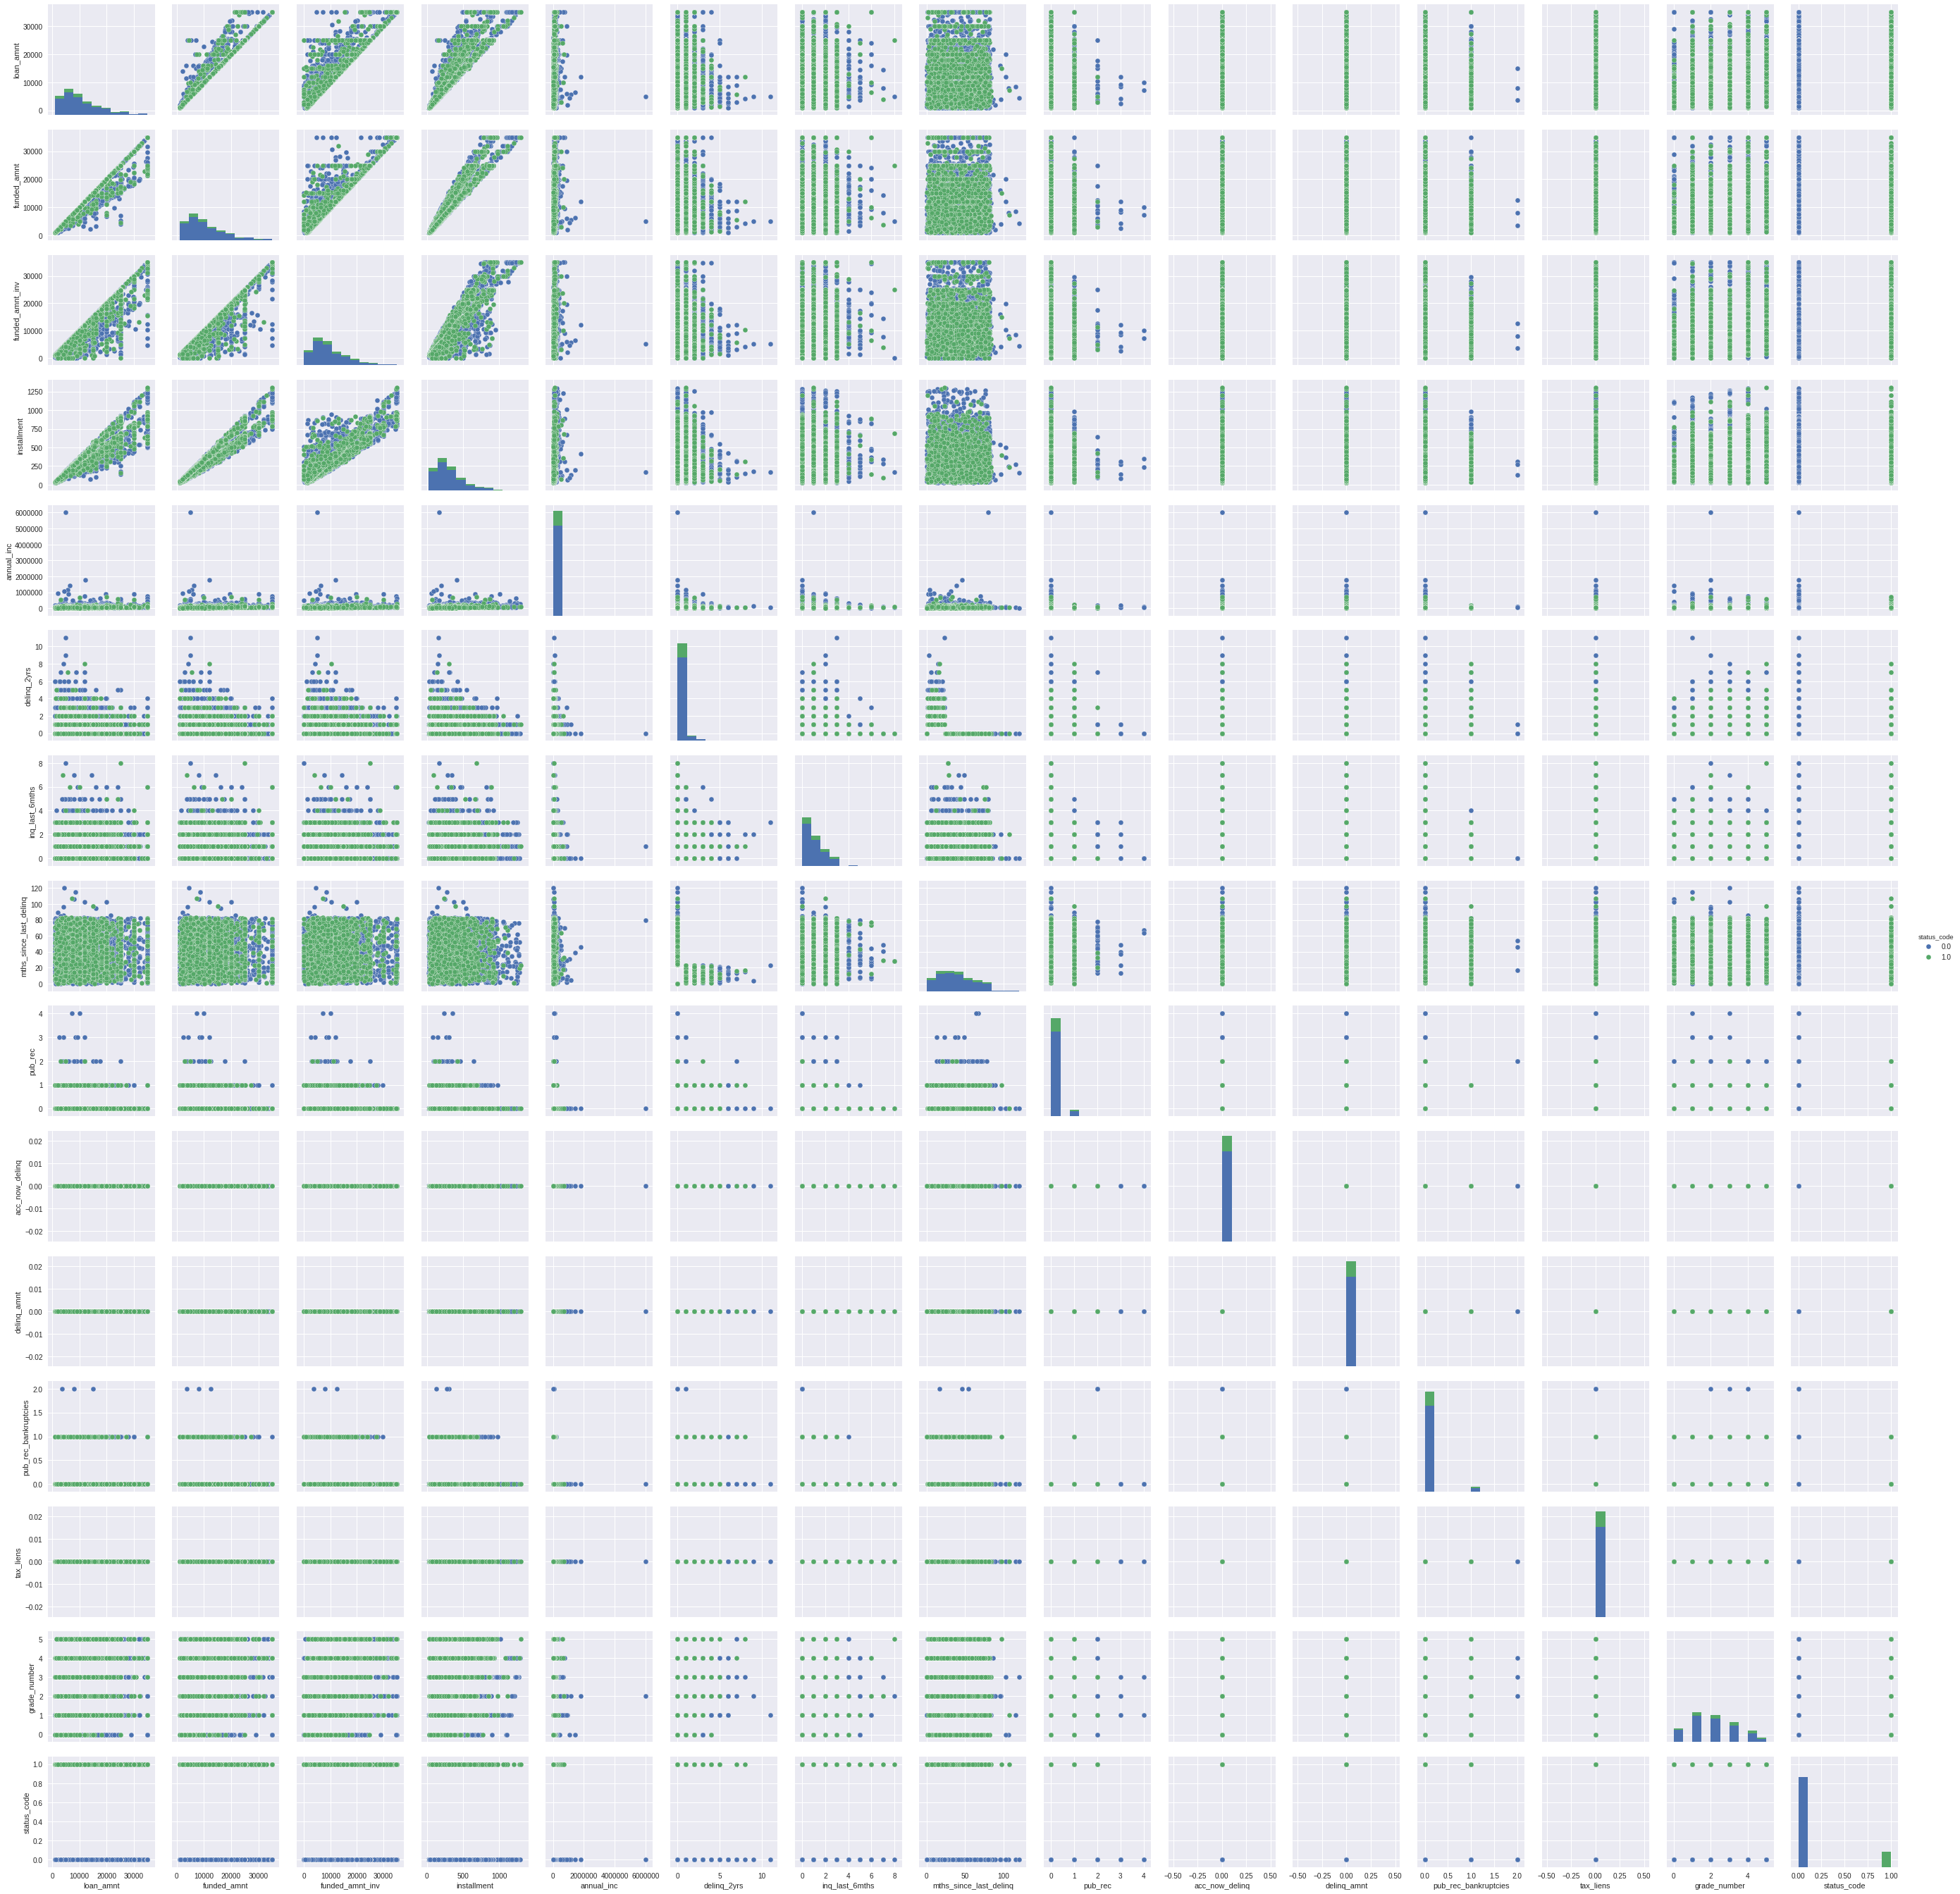

In [89]:
sns.pairplot(Q1loans, hue="status_code")

In [97]:
Q1loans.corr()

,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,pub_rec,acc_now_delinq,delinq_amnt,pub_rec_bankruptcies,tax_liens,grade_number,status_code
loan_amnt,1.000000,0.981554,0.947913,0.934634,0.219441,-0.025534,0.005928,0.019160,-0.055687,NaN,NaN,-0.034230,NaN,0.350957,0.048413
funded_amnt,0.981554,1.000000,0.966995,0.959602,0.217779,-0.028314,0.006332,0.022870,-0.055240,NaN,NaN,-0.034522,NaN,0.346902,0.047059
funded_amnt_inv,0.947913,0.966995,1.000000,0.920342,0.209589,-0.033402,-0.004412,0.027534,-0.061648,NaN,NaN,-0.045679,NaN,0.332801,0.038474
installment,0.934634,0.959602,0.920342,1.000000,0.223161,-0.021450,0.004864,0.010623,-0.052748,NaN,NaN,-0.033382,NaN,0.306424,0.020450
annual_inc,0.219441,0.217779,0.209589,0.223161,1.000000,0.017988,0.022647,-0.009212,-0.022122,NaN,NaN,-0.018242,NaN,0.052646,-0.043671
delinq_2yrs,-0.025534,-0.028314,-0.033402,-0.021450,0.017988,1.000000,0.003145,-0.624247,-0.013768,NaN,NaN,-0.001072,NaN,0.109173,0.011214
inq_last_6mths,0.005928,0.006332,-0.004412,0.004864,0.022647,0.003145,1.000000,0.005213,0.022953,NaN,NaN,0.008399,NaN,0.111425,0.052464
mths_since_last_delinq,0.019160,0.022870,0.027534,0.010623,-0.009212,-0.624247,0.005213,1.000000,0.048745,NaN,NaN,0.027030,NaN,-0.104075,0.014043
pub_rec,-0.055687,-0.055240,-0.061648,-0.052748,-0.022122,-0.013768,0.022953,0.048745,1.000000,NaN,NaN,0.758719,NaN,0.031070,0.043515
acc_now_delinq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Count of Loans per Status and Grade

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning:

remove_na is deprecated and is a private function. Do not use.

No handles with labels found to put in legend.


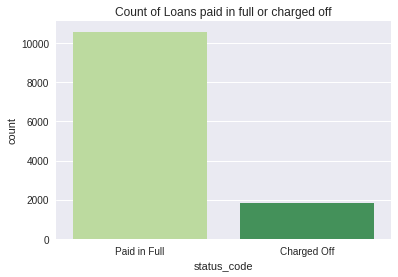

No handles with labels found to put in legend.


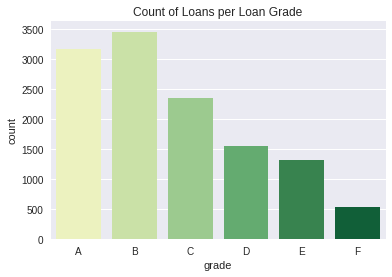

In [96]:
sns.countplot(x='status_code', data=Q1loans, palette="YlGn")
objects = ['Paid in Full','Charged Off']
indices = np.arange(len(objects))
plt.title("Count of Loans paid in full or charged off") 
plt.xticks(indices,objects)
plt.legend()
plt.show()

sns.countplot(x='grade', data=Q1loans, palette="YlGn")
objects = ['A','B','C','D','E','F']
indices = np.arange(len(objects))
plt.title("Count of Loans per Loan Grade") 
plt.xticks(indices,objects)
plt.legend()
plt.show()

list correlations here

Predicting Loan Status (did the loan default or get paid in full?)

Set our predictors and result dataset

We are using income, delinquencies in the the last 2 years, credit inquiries in the last 6 months, public records, 
accounts not delinquent, delinquency amount, bankruptcies, tax liens, hardship flag, and loan grade to predict status.

In [0]:
predictors = Q1loans.drop(['grade','sub_grade','loan_status','loan_amnt',
 'funded_amnt',
 'funded_amnt_inv',
 'term',
 'installment',
 'emp_title',
 'emp_length',
 'home_ownership',
 'issue_d',
 'pymnt_plan',
 'purpose',
 'earliest_cr_line',],axis=1)
result  = Q1loans['status_code']

Code the hardsip flag column 
N = 0
Y = 1

In [29]:
predictors['hardship_flag'].replace(
    to_replace=['N'],
    value=0,
    inplace=True
)
predictors['hardship_flag'].replace(
    to_replace=['Y'],
    value=1,
    inplace=True
)
predictors.tail(5)



,annual_inc,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,pub_rec,acc_now_delinq,delinq_amnt,pub_rec_bankruptcies,tax_liens,hardship_flag,grade_number,status_code
39620,80000.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0,2.0,0.0
39631,35000.0,0.0,0.0,52.0,1.0,0.0,0.0,1.0,0.0,0,2.0,0.0
39692,39000.0,0.0,3.0,60.0,1.0,0.0,0.0,1.0,0.0,0,3.0,1.0
39735,40000.0,0.0,3.0,54.0,1.0,0.0,0.0,1.0,0.0,0,2.0,1.0
39749,36153.0,0.0,2.0,0.0,1.0,0.0,0.0,1.0,0.0,0,3.0,0.0


In [30]:
print(list(predictors))
print(list(result))

['annual_inc', 'delinq_2yrs', 'inq_last_6mths', 'mths_since_last_delinq', 'pub_rec', 'acc_now_delinq', 'delinq_amnt', 'pub_rec_bankruptcies', 'tax_liens', 'hardship_flag', 'grade_number', 'status_code']
[0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0

In [31]:
predictors.describe()

,annual_inc,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,pub_rec,acc_now_delinq,delinq_amnt,pub_rec_bankruptcies,tax_liens,hardship_flag,grade_number,status_code
count,1.239100e+04,12391.000000,12391.000000,12391.000000,12391.000000,12391.0,12391.0,12391.000000,12391.0,12391.0,12391.000000,12391.000000
mean,7.149966e+04,0.422403,0.884916,37.187717,0.070212,0.0,0.0,0.046647,0.0,0.0,2.001130,0.146074
std,7.543009e+04,0.763109,1.020527,21.369884,0.272630,0.0,0.0,0.212035,0.0,0.0,1.334099,0.353194
min,8.500000e+03,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000
25%,4.320000e+04,0.000000,0.000000,20.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,1.000000,0.000000
50%,6.000000e+04,0.000000,1.000000,35.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,2.000000,0.000000
75%,8.500000e+04,1.000000,1.000000,53.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,3.000000,0.000000
max,6.000000e+06,11.000000,8.000000,120.000000,4.000000,0.0,0.0,2.000000,0.0,0.0,5.000000,1.000000


In [32]:
print(predictors.info())


<class 'pandas.core.frame.DataFrame'>
Int64Index: 12391 entries, 3 to 39749
Data columns (total 12 columns):
annual_inc                12391 non-null float64
delinq_2yrs               12391 non-null float64
inq_last_6mths            12391 non-null float64
mths_since_last_delinq    12391 non-null float64
pub_rec                   12391 non-null float64
acc_now_delinq            12391 non-null float64
delinq_amnt               12391 non-null float64
pub_rec_bankruptcies      12391 non-null float64
tax_liens                 12391 non-null float64
hardship_flag             12391 non-null int64
grade_number              12391 non-null float64
status_code               12391 non-null float64
dtypes: float64(11), int64(1)
memory usage: 1.5 MB
None


In [33]:
result.head()

3     0.0
4     0.0
16    0.0
18    0.0
27    1.0
Name: status_code, dtype: float64

In [34]:
result.isnull().values.any()


False

Set up the training and testing sets. We are using a 2/3 split for all proceeding models.

In [0]:
trainx, testx, trainy, testy = train_test_split(predictors, result, test_size = 0.33, random_state = 1)

Model 1: linear regression

In [0]:
lm = LinearRegression()
lm1 = lm.fit(trainx,trainy)

In [0]:
lm1_predictions = lm1.predict(testx)


In [0]:
meandif = np.mean(abs(testy - lm1_predictions))
sumdif = np.sum(abs(testy - lm1_predictions))
score = lm1.score(testx, testy)

In [39]:
print("Mean Difference between True and Prediction:") 
print(meandif)
print("Sum of Difference between all True and Predicted Values:")
print(sumdif)
print("Model Score:")
print(score)

Mean Difference between True and Prediction:
1.3817432570650774e-15
Sum of Difference between all True and Predicted Values:
5.651329921396172e-12
Model Score:
1.0


Model 2: decision tree

In [0]:
from sklearn.tree import DecisionTreeClassifier


In [0]:
clf = DecisionTreeClassifier().fit(trainx, trainy)


In [0]:
clf_predictions = clf.predict(testx)


In [0]:
score2 = clf.score(testx, testy)
meandif2 = np.mean(abs(testy - clf_predictions))
sumdif2 = np.sum(abs(testy - clf_predictions))

In [44]:
print("Mean Difference between True and Prediction:") 
print(meandif2)
print("Sum of Difference between all True and Predicted Values:")
print(sumdif2)
print("Model Score:")
print(score2)

Mean Difference between True and Prediction:
0.0
Sum of Difference between all True and Predicted Values:
0.0
Model Score:
1.0


Model 3: Gaussian Bayes

In [0]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

In [46]:
gnb.fit(trainx, trainy)


GaussianNB(priors=None, var_smoothing=1e-09)

In [0]:
gnb_predictions = gnb.predict(testx)


In [0]:
score3 = gnb.score(testx, testy)
meandif3 = np.mean(abs(testy - gnb_predictions))
sumdif3 = np.sum(abs(testy - gnb_predictions))

In [49]:
print("Mean Difference between True and Prediction:") 
print(meandif3)
print("Sum of Difference between all True and Predicted Values:")
print(sumdif3)
print("Model Score:")
print(score3)

Mean Difference between True and Prediction:
0.13863080684596576
Sum of Difference between all True and Predicted Values:
567.0
Model Score:
0.8613691931540343


How did the models measure up against each other?

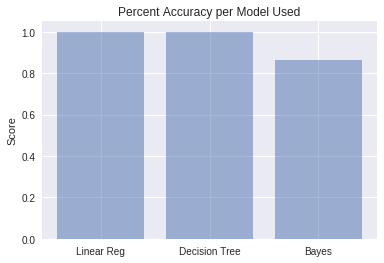

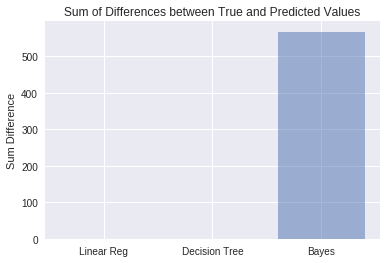

In [50]:
objects = ('Linear Reg', 'Decision Tree', 'Bayes')
y_pos = np.arange(len(objects))
performance = [score,score2,score3]
 
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Score')
plt.title('Percent Accuracy per Model Used')
 
plt.show()

objects = ('Linear Reg', 'Decision Tree', 'Bayes')
y_pos = np.arange(len(objects))
performance = [sumdif,sumdif2,sumdif3]
 
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Sum Difference')
plt.title('Sum of Differences between True and Predicted Values')
 
plt.show()

Predicting Loan Grade

Set our predictors and result dataset

We are using income, delinquencies in the the last 2 years, credit inquiries in the last 6 months, public records, 
accounts not delinquent, delinquency amount, bankruptcies, tax liens, hardship flag to predict loan grade.

In [0]:
predictors2 = Q1loans.drop(['grade','sub_grade','loan_status','loan_amnt',
 'funded_amnt',
 'funded_amnt_inv',
 'term',
 'installment',
 'emp_title',
 'emp_length',
 'home_ownership',
 'issue_d',
 'pymnt_plan',
 'purpose',
 'earliest_cr_line', 'hardship_flag', 'grade_number', 'status_code'],axis=1)
result2  = Q1loans['grade_number']

In [52]:
print(predictors2.head())
print(result2.head())

    annual_inc  delinq_2yrs  inq_last_6mths  mths_since_last_delinq  pub_rec  \
3      49200.0          0.0             1.0                    35.0      0.0   
4      80000.0          0.0             0.0                    38.0      0.0   
16     42000.0          0.0             2.0                    61.0      0.0   
18     84000.0          2.0             0.0                     8.0      0.0   
27     50004.0          3.0             0.0                    20.0      0.0   

    acc_now_delinq  delinq_amnt  pub_rec_bankruptcies  tax_liens  
3              0.0          0.0                   0.0        0.0  
4              0.0          0.0                   0.0        0.0  
16             0.0          0.0                   0.0        0.0  
18             0.0          0.0                   0.0        0.0  
27             0.0          0.0                   0.0        0.0  
3     2.0
4     1.0
16    2.0
18    1.0
27    3.0
Name: grade_number, dtype: float64


In [0]:
trainx2, testx2, trainy2, testy2 = train_test_split(predictors2, result2, test_size = 0.33, random_state = 1)

Model 1a: linear regression

In [0]:
lm = LinearRegression()
lm2 = lm.fit(trainx2,trainy2)

In [0]:
lm2_predictions = lm2.predict(testx2)


In [0]:
score4 = lm2.score(testx2, testy2)
meandif4 = np.mean(abs(testy2 - lm2_predictions))
sumdif4 = np.sum(abs(testy2 - lm2_predictions))

In [57]:
print("Mean Difference between True and Prediction:") 
print(meandif4)
print("Sum of Difference between all True and Predicted Values:")
print(sumdif4)
print("Model Score:")
print(score4)

Mean Difference between True and Prediction:
1.0742920482987492
Sum of Difference between all True and Predicted Values:
4393.854477541885
Model Score:
0.023415687134949015


Model 2a: decision tree

In [0]:
clf2 = DecisionTreeClassifier().fit(trainx2, trainy2)


In [0]:
clf2_predictions = clf2.predict(testx2)


In [0]:
score5 = clf2.score(testx2, testy2)
meandif5 = np.mean(abs(testy2 - clf2_predictions))
sumdif5 = np.sum(abs(testy2 - clf2_predictions))

In [61]:
print("Mean Difference between True and Prediction:") 
print(meandif5)
print("Sum of Difference between all True and Predicted Values:")
print(sumdif5)
print("Model Score:")
print(score5)

Mean Difference between True and Prediction:
1.4286063569682153
Sum of Difference between all True and Predicted Values:
5843.0
Model Score:
0.22762836185819071


Model 3a: Gaussian Bayes

In [0]:
gnb2 = GaussianNB()

In [63]:
gnb2.fit(trainx2, trainy2)


GaussianNB(priors=None, var_smoothing=1e-09)

In [0]:
gnb2_predictions = gnb2.predict(testx2)


In [0]:
score6 = gnb2.score(testx2, testy2)
meandif6 = np.mean(abs(testy2 - gnb2_predictions))
sumdif6 = np.sum(abs(testy2 - gnb2_predictions))

In [66]:
print("Mean Difference between True and Prediction:") 
print(meandif6)
print("Sum of Difference between all True and Predicted Values:")
print(sumdif6)
print("Model Score:")
print(score6)


Mean Difference between True and Prediction:
1.2471882640586798
Sum of Difference between all True and Predicted Values:
5101.0
Model Score:
0.26919315403422983


How did the models measure up against each other?

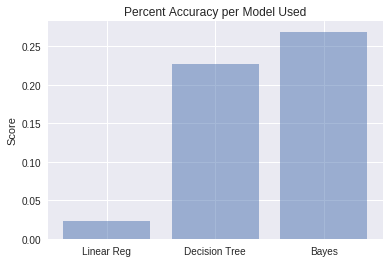

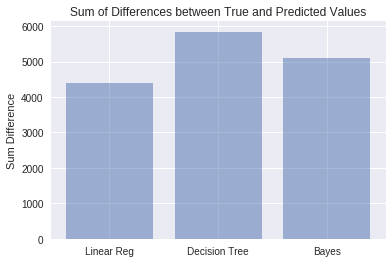

In [67]:
objects = ('Linear Reg', 'Decision Tree', 'Bayes')
y_pos = np.arange(len(objects))
performance = [score4,score5,score6]
 
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Score')
plt.title('Percent Accuracy per Model Used')
 
plt.show()

objects = ('Linear Reg', 'Decision Tree', 'Bayes')
y_pos = np.arange(len(objects))
performance = [sumdif4,sumdif5,sumdif6]
 
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Sum Difference')
plt.title('Sum of Differences between True and Predicted Values')
 
plt.show()

What if we choose a different set of predictors?

In [0]:
predictors3 = Q1loans

In [0]:
predictors3 = predictors3.drop([
 'funded_amnt_inv',
 'term',
 'installment',
 'grade',
 'sub_grade',
 'emp_title',
 'emp_length',
 'home_ownership',
 'issue_d',
 'loan_status',
 'pymnt_plan',
 'purpose',
 'earliest_cr_line',
 'mths_since_last_delinq',
 'acc_now_delinq',
 'delinq_amnt',
 'pub_rec_bankruptcies',
 'tax_liens',
 'hardship_flag',
 'grade_number',
 'status_code'],axis=1)
result3  = Q1loans['grade_number']

In [70]:
print(list(result3))
print(list(predictors3))

[2.0, 1.0, 2.0, 1.0, 3.0, 1.0, 2.0, 0.0, 0.0, 1.0, 3.0, 2.0, 2.0, 2.0, 4.0, 3.0, 1.0, 1.0, 1.0, 1.0, 5.0, 0.0, 1.0, 3.0, 0.0, 1.0, 2.0, 1.0, 1.0, 2.0, 2.0, 1.0, 1.0, 4.0, 4.0, 1.0, 2.0, 3.0, 1.0, 2.0, 1.0, 2.0, 3.0, 3.0, 2.0, 1.0, 2.0, 2.0, 1.0, 1.0, 2.0, 3.0, 1.0, 2.0, 3.0, 1.0, 0.0, 3.0, 4.0, 0.0, 2.0, 2.0, 0.0, 3.0, 1.0, 1.0, 1.0, 4.0, 3.0, 3.0, 2.0, 2.0, 1.0, 3.0, 2.0, 2.0, 2.0, 4.0, 2.0, 3.0, 2.0, 4.0, 2.0, 1.0, 1.0, 1.0, 4.0, 2.0, 1.0, 1.0, 1.0, 3.0, 2.0, 2.0, 2.0, 2.0, 5.0, 1.0, 2.0, 3.0, 1.0, 0.0, 0.0, 3.0, 1.0, 1.0, 0.0, 3.0, 1.0, 3.0, 0.0, 3.0, 1.0, 2.0, 0.0, 2.0, 4.0, 2.0, 2.0, 1.0, 1.0, 4.0, 1.0, 1.0, 2.0, 2.0, 1.0, 2.0, 1.0, 1.0, 1.0, 1.0, 4.0, 1.0, 3.0, 1.0, 4.0, 1.0, 3.0, 2.0, 1.0, 4.0, 4.0, 4.0, 2.0, 3.0, 3.0, 1.0, 4.0, 3.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 2.0, 0.0, 4.0, 4.0, 2.0, 0.0, 4.0, 2.0, 2.0, 5.0, 0.0, 3.0, 3.0, 2.0, 2.0, 1.0, 1.0, 2.0, 2.0, 3.0, 2.0, 1.0, 1.0, 2.0, 4.0, 1.0, 1.0, 3.0, 0.0, 2.0, 3.0, 0.0, 2.0, 5.0, 2.0, 3.0, 2.0, 1.0, 2.0, 5.0, 1.0, 0.0, 1.0, 3.0,

Let's try using loan amount, funded amount, annual income, delinquencies in 2 yers, inquiries in the last 6 mos, and public records to predict loan grade.

In [0]:
trainx3, testx3, trainy3, testy3 = train_test_split(predictors3, result3, test_size = 0.33, random_state = 1)

Model 1b: linear regression

In [0]:
lm = LinearRegression()
lm3 = lm.fit(trainx3,trainy3)

In [0]:
lm3_predictions = lm3.predict(testx3)


In [0]:
score7 = lm3.score(testx3, testy3)
meandif7 = np.mean(abs(testy3 - lm3_predictions))
sumdif7 = np.sum(abs(testy3 - lm3_predictions))

In [75]:
print("Mean Difference between True and Prediction:") 
print(meandif7)
print("Sum of Difference between all True and Predicted Values:")
print(sumdif7)
print("Model Score:")
print(score7)

Mean Difference between True and Prediction:
1.0199503299180834
Sum of Difference between all True and Predicted Values:
4171.59684936496
Model Score:
0.12544939635110897


Model 2b: decision tree

In [0]:
clf3 = DecisionTreeClassifier().fit(trainx3, trainy3)


In [0]:
clf3_predictions = clf3.predict(testx3)


In [0]:
score8 = clf3.score(testx3, testy3)
meandif8 = np.mean(abs(testy3 - clf3_predictions))
sumdif8 = np.sum(abs(testy3 - clf3_predictions))

In [79]:
print("Mean Difference between True and Prediction:") 
print(meandif8)
print("Sum of Difference between all True and Predicted Values:")
print(sumdif8)
print("Model Score:")
print(score8)

Mean Difference between True and Prediction:
1.3156479217603911
Sum of Difference between all True and Predicted Values:
5381.0
Model Score:
0.24034229828850856


Model 3b: Gaussian Bayes

In [0]:
gnb3 = GaussianNB()

In [81]:
gnb3.fit(trainx3, trainy3)


GaussianNB(priors=None, var_smoothing=1e-09)

In [0]:
gnb3_predictions = gnb3.predict(testx3)


In [0]:
score9 = gnb3.score(testx3, testy3)
meandif9 = np.mean(abs(testy3 - gnb3_predictions))
sumdif9 = np.sum(abs(testy3 - gnb3_predictions))

In [84]:
print("Mean Difference between True and Prediction:") 
print(meandif9)
print("Sum of Difference between all True and Predicted Values:")
print(sumdif9)
print("Model Score:")
print(score9)


Mean Difference between True and Prediction:
1.3550122249388754
Sum of Difference between all True and Predicted Values:
5542.0
Model Score:
0.2371638141809291


Which model(s) for predicting Loan Grade is better?

Version a: predictors are income, delinquencies in the the last 2 years, credit inquiries in the last 6 months, public records, accounts not delinquent, delinquency amount, bankruptcies, tax liens, hardship flag

Version b: predictors are loan amount, funded amount, annual income, delinquencies in 2 yers, inquiries in the last 6 mos, and public records



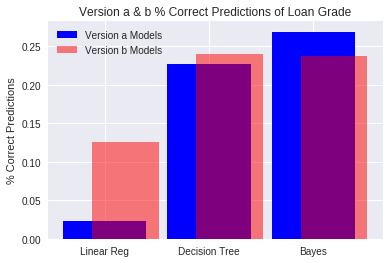

In [85]:
width = 0.8

firstModels   = [score4,score5,score6]
secondModels    = [score7,score8,score9]

objects = ['Linear Reg','Decision Tree','Bayes']

indices = np.arange(len(objects))

plt.bar(indices, firstModels, width=width, 
        color='b', label='Version a Models')
plt.bar([i+0.25*width for i in indices], secondModels, 
        width=0.8*width, color='r', alpha=0.5, label='Version b Models')

plt.xticks(indices, objects)
plt.ylabel('% Correct Predictions')
plt.title('Version a & b % Correct Predictions of Loan Grade')



plt.legend()

plt.show()

https://stackoverflow.com/questions/23293011/how-to-plot-a-superimposed-bar-chart-using-matplotlib-in-python

https://seaborn.pydata.org/generated/seaborn.pairplot.html